# Data Understanding

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from collections import Counter
import seaborn as sns
import dask.dataframe as dd
from scipy.stats import randint, uniform


!pip install pytorch-tabular

from pytorch_tabular import TabularModel
from pytorch_tabular.models.category_embedding.config import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig

from catboost import CatBoostClassifier, Pool

import random

In [3]:
df_sessions = pd.read_csv('data/ga_sessions.csv')
df_hits = pd.read_csv('data/ga_hits.csv')

/var/folders/3s/h4tbdn8n3bg8g9r44dkph73w0000gn/T/ipykernel_8587/2144210169.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv('data/ga_sessions.csv')


In [4]:
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [5]:
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [6]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [7]:
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [1]:
# Merge two tables into one based on common features

In [9]:
merged_df = pd.merge(df_sessions, df_hits, left_on=['session_id', 'visit_date'], right_on=['session_id', 'hit_date'], how='inner')

In [3]:
# drop dublicates

In [11]:
merged_df = merged_df.drop_duplicates(subset=['session_id', 'hit_date'], keep='first')

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1732266 entries, 0 to 15685206
Data columns (total 28 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   client_id                 object 
 2   visit_date                object 
 3   visit_time                object 
 4   visit_number              int64  
 5   utm_source                object 
 6   utm_medium                object 
 7   utm_campaign              object 
 8   utm_adcontent             object 
 9   utm_keyword               object 
 10  device_category           object 
 11  device_os                 object 
 12  device_brand              object 
 13  device_model              object 
 14  device_screen_resolution  object 
 15  device_browser            object 
 16  geo_country               object 
 17  geo_city                  object 
 18  hit_date                  object 
 19  hit_time                  float64
 20  hit_number                in

In [13]:
merged_df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-11-24,3665.0,3,event,NaN,podpiska.sberauto.com/,sub_page_view,sub_landing,NaN,NaN
2,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,2021-11-14,921.0,3,event,NaN,podpiska.sberauto.com/,sub_page_view,sub_landing,NaN,NaN
3,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-12-28,84155.0,10,event,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,KWTCzSIXzoqUWjfUQMgP,NaN
19,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,...,2021-05-29,NaN,2,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,NaN
22,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,...,2021-05-29,NaN,3,event,HbolMJUevblAbkHClEQa,sberauto.com/cars?city=1&rental_page=rental_on...,quiz,quiz_show,KclpemfoHstknWHFiLit,NaN


# Data Preparation

### Drop columns

In [5]:
if (merged_df['visit_date'].values == merged_df['hit_date'].values).all():
    print("All values are identical")
else:
    print("There are differences")

NameError: name 'merged_df' is not defined

In [17]:
merged_df = merged_df.drop(columns=['visit_date'])

In [18]:
merged_df.session_id.nunique()

1732266

In [20]:
merged_df = merged_df.drop(columns=['client_id', 'session_id'])

In [21]:
merged_df.head()

,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,...,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,...,2021-11-24,3665.0,3,event,NaN,podpiska.sberauto.com/,sub_page_view,sub_landing,NaN,NaN
2,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,...,2021-11-14,921.0,3,event,NaN,podpiska.sberauto.com/,sub_page_view,sub_landing,NaN,NaN
3,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,...,2021-12-28,84155.0,10,event,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,KWTCzSIXzoqUWjfUQMgP,NaN
19,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,...,2021-05-29,NaN,2,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,NaN
22,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,...,2021-05-29,NaN,3,event,HbolMJUevblAbkHClEQa,sberauto.com/cars?city=1&rental_page=rental_on...,quiz,quiz_show,KclpemfoHstknWHFiLit,NaN


In [22]:
merged_df[merged_df.event_action == 'sub_car_claim_click']

,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,...,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
25890,14:00:00,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,Huawei,...,2021-09-17,NaN,13,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/6afb1543?utm_source_initial=...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,NaN
42969,10:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,...,2021-07-11,NaN,15,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/bf24b977?rental_page=rental_car,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,NaN
76767,23:55:57,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,...,2021-12-01,114902.0,16,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,NaN
81974,21:00:00,3,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,...,2021-09-07,NaN,5,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/6afb1543?rental_page=rental_car,sub_button_click,sub_car_claim_click,nzDXtAvtTrzfwscIPQkp,NaN
94133,00:00:00,1,bByPQxmDaMXgpHeypKSM,referral,FTjNLDyTrXaWYgZymFkV,PkybGvWbaqORmxjNunqZ,NaN,mobile,NaN,Samsung,...,2021-08-13,NaN,17,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/f28947a1?utm_source_initial=...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15571355,12:54:52,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,...,2021-11-27,95953.0,14,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,NaN
15594564,07:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Xiaomi,...,2021-07-24,NaN,24,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/bfc21661?utm_source_initial=...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,NaN
15634483,09:30:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,...,2021-12-26,245585.0,21,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,NaN
15653984,13:00:00,5,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,...,2021-08-31,NaN,1,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/0208cd2b?rental_page=rental_car,sub_button_click,sub_car_claim_click,nzDXtAvtTrzfwscIPQkp,NaN


In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1732266 entries, 0 to 15685206
Data columns (total 25 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   visit_time                object 
 1   visit_number              int64  
 2   utm_source                object 
 3   utm_medium                object 
 4   utm_campaign              object 
 5   utm_adcontent             object 
 6   utm_keyword               object 
 7   device_category           object 
 8   device_os                 object 
 9   device_brand              object 
 10  device_model              object 
 11  device_screen_resolution  object 
 12  device_browser            object 
 13  geo_country               object 
 14  geo_city                  object 
 15  hit_date                  object 
 16  hit_time                  float64
 17  hit_number                int64  
 18  hit_type                  object 
 19  hit_referer               object 
 20  hit_page_path             ob

In [24]:
df_cleaned = merged_df.copy()

### Data cleaning

In [7]:
# Let's start processing our data

In [9]:
# Remove duplicates and save the table for further use during modeling

In [28]:
df_cleaned[df_cleaned.duplicated()]

,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,...,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
32344,10:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,...,2021-05-24,NaN,1,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/faq,sub_page_view,sub_faq,KclpemfoHstknWHFiLit,NaN
72231,22:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,...,2021-06-28,NaN,3,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,NaN
87560,13:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,...,2021-05-28,NaN,3,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,NaN
102014,22:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,...,2021-06-28,NaN,3,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,NaN
103479,12:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Xiaomi,...,2021-07-26,NaN,3,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15684277,04:00:00,1,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,TuyPWsGQruPMpKvRxeBF,NaN,desktop,NaN,NaN,...,2021-09-18,NaN,3,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,NaN
15684280,14:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,NaN,NaN,...,2021-06-18,NaN,3,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,NaN
15684530,10:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,...,2021-08-10,NaN,4,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,OHfyUfDKdPgBdvelDlfG,NaN
15685055,08:00:00,1,PlbkrSYoHuZBWfYjYnfw,cpm,FTjNLDyTrXaWYgZymFkV,TuyPWsGQruPMpKvRxeBF,NaN,desktop,NaN,NaN,...,2021-08-17,NaN,2,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,NaN


In [29]:
df_cleaned = df_cleaned.drop_duplicates()

In [30]:
df_cleaned.to_csv("data/df_ready.csv", index=False)

In [31]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1691967 entries, 0 to 15685206
Data columns (total 25 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   visit_time                object 
 1   visit_number              int64  
 2   utm_source                object 
 3   utm_medium                object 
 4   utm_campaign              object 
 5   utm_adcontent             object 
 6   utm_keyword               object 
 7   device_category           object 
 8   device_os                 object 
 9   device_brand              object 
 10  device_model              object 
 11  device_screen_resolution  object 
 12  device_browser            object 
 13  geo_country               object 
 14  geo_city                  object 
 15  hit_date                  object 
 16  hit_time                  float64
 17  hit_number                int64  
 18  hit_type                  object 
 19  hit_referer               object 
 20  hit_page_path             ob

<Axes: >

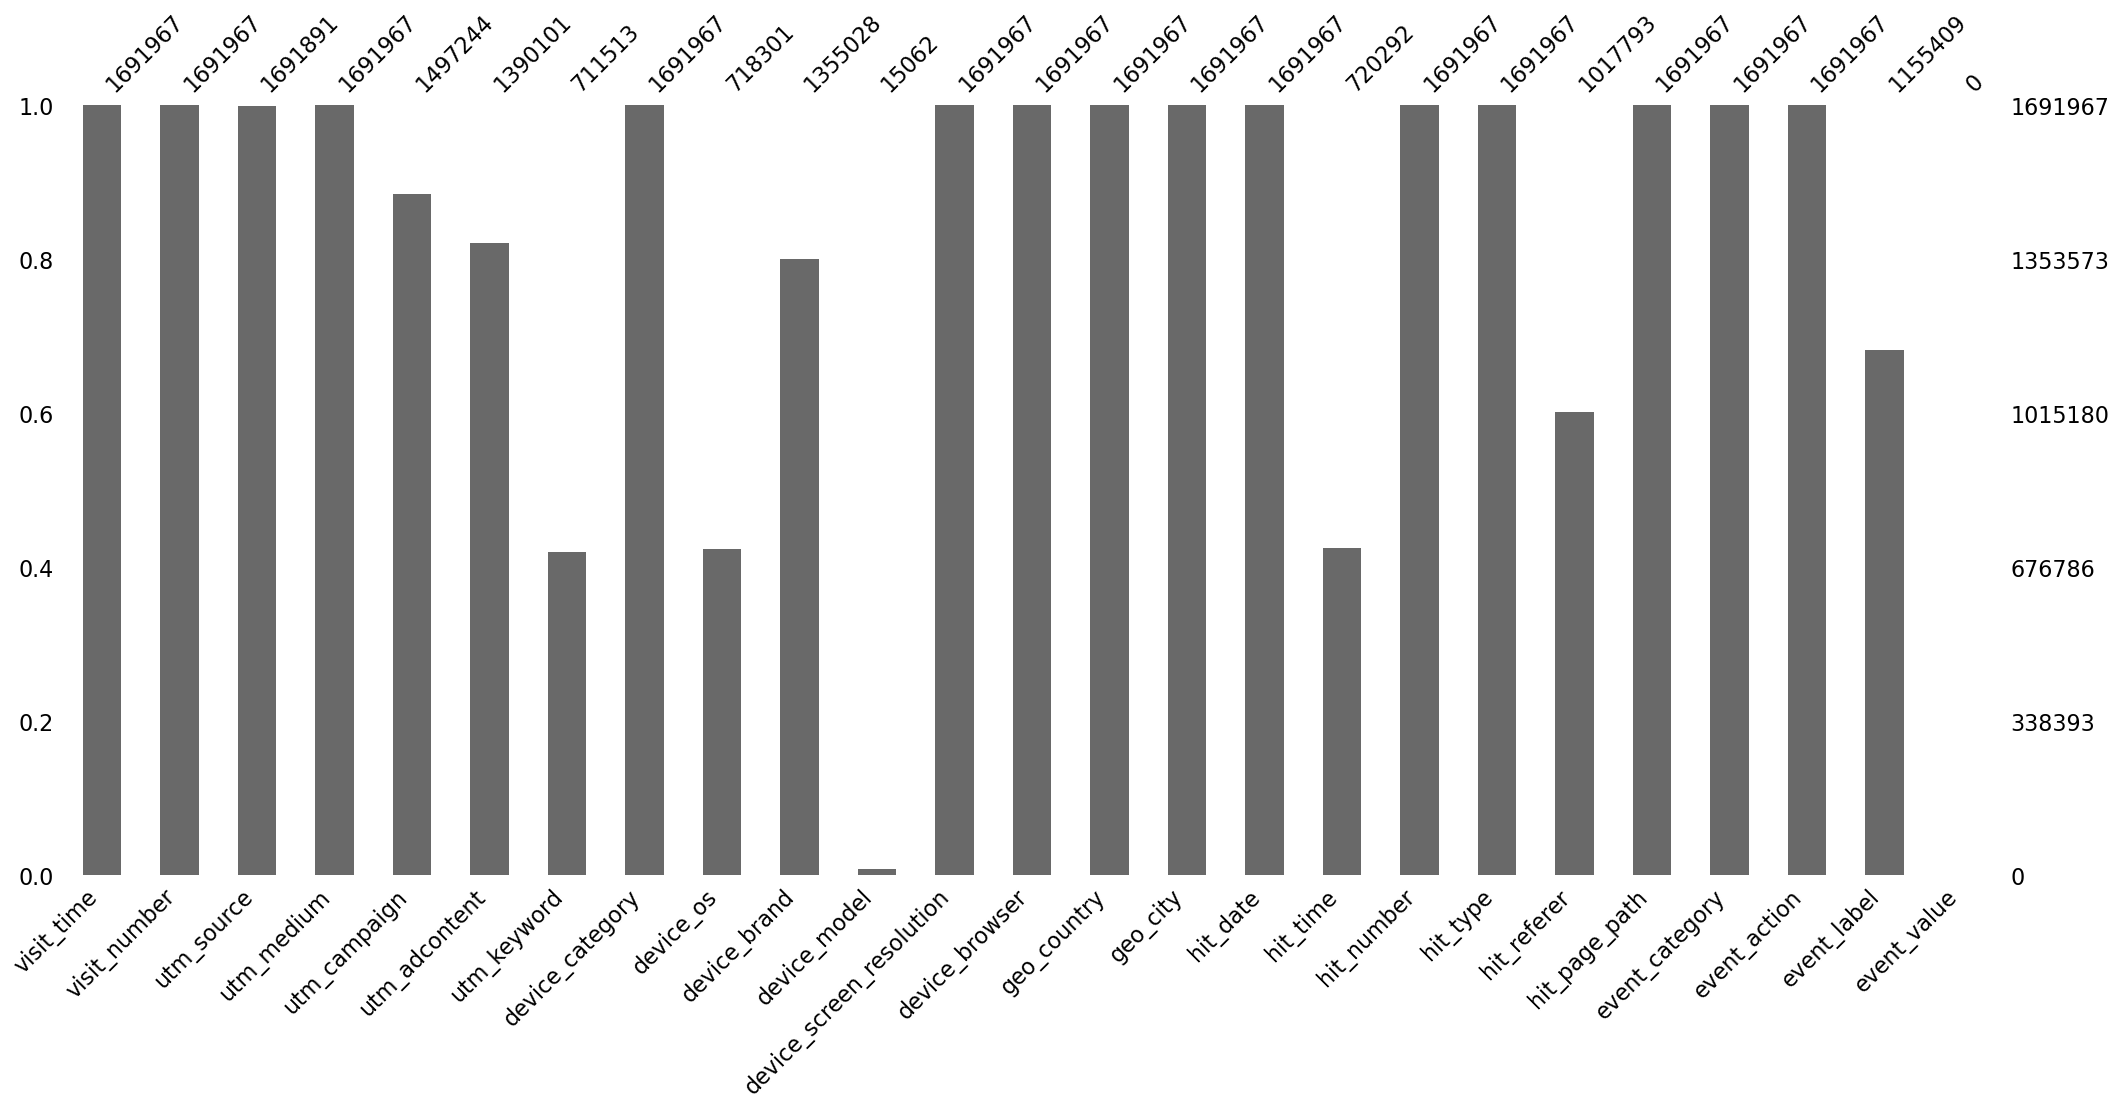

In [32]:
msno.bar(df_cleaned)

In [33]:
missing_values = ((df_cleaned.isna().sum() / len(df_cleaned)) * 100).sort_values()
print('Percentage of missing values:')
print(missing_values)

Процент пропущенных значений:


visit_time                    0.000000
event_action                  0.000000
event_category                0.000000
hit_page_path                 0.000000
hit_type                      0.000000
hit_number                    0.000000
hit_date                      0.000000
geo_city                      0.000000
geo_country                   0.000000
device_screen_resolution      0.000000
device_browser                0.000000
device_category               0.000000
utm_medium                    0.000000
visit_number                  0.000000
utm_source                    0.004492
utm_campaign                 11.508676
utm_adcontent                17.841128
device_brand                 19.914041
event_label                  31.712084
hit_referer                  39.845576
hit_time                     57.428721
device_os                    57.546394
utm_keyword                  57.947584
device_model                 99.109794
event_value                 100.000000
dtype: float64

In [34]:
# Удалим неимформативные признаки, где процент пропущенных значений больше 25.

In [35]:
df_cleaned = df_cleaned.drop(columns=['device_model', 'utm_keyword', 'device_os'])

In [36]:
df_cleaned = df_cleaned.drop(columns=['event_value', 'hit_time', 'hit_referer', 'event_label'])

In [37]:
missing_values = ((df_cleaned.isna().sum() / len(df_cleaned)) * 100).sort_values()
print('Percentage of missing values:')
print(missing_values)

Процент пропущенных значений:


visit_time                   0.000000
hit_page_path                0.000000
hit_type                     0.000000
hit_number                   0.000000
hit_date                     0.000000
geo_city                     0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
utm_medium                   0.000000
visit_number                 0.000000
event_category               0.000000
event_action                 0.000000
utm_source                   0.004492
utm_campaign                11.508676
utm_adcontent               17.841128
device_brand                19.914041
dtype: float64

In [11]:
def print_useful_rows_info(df):
    complete_rows = df.dropna()
    print('Number of fully complete rows in the dataset:', len(complete_rows))
    print('Percentage of fully complete rows in the dataset:', round(len(complete_rows) / len(df) * 100, 2))

In [13]:
print_useful_rows_info(df_cleaned)

NameError: name 'df_cleaned' is not defined

In [40]:
df_delete_cols = df_cleaned.copy()

In [17]:
# Missing values are still present, but now we will start filling them

In [42]:
df_cleaned.device_brand.value_counts(dropna=False)

device_brand
Apple       483749
NaN         336939
Samsung     308961
Xiaomi      263494
Huawei      172183
             ...  
Tesla            1
Vodafone         1
Wexler           1
Smarteo          1
Maxvi            1
Name: count, Length: 201, dtype: int64

In [15]:
# It's possible that the missing values in device_brand are present in other columns

In [44]:
merged_df[merged_df['device_brand'].isna()][[
    'device_brand',
    'device_os',
    'device_category',
    'device_model',
    'device_screen_resolution',
    'device_browser'
]].head(50)


,device_brand,device_os,device_category,device_model,device_screen_resolution,device_browser
240,NaN,Windows,desktop,NaN,1536x864,Chrome
516,NaN,NaN,desktop,NaN,1920x1080,YaBrowser
518,NaN,NaN,desktop,NaN,1920x1080,Chrome
586,NaN,Windows,desktop,NaN,1920x1080,Chrome
681,NaN,NaN,desktop,NaN,1280x720,Chrome
685,NaN,NaN,desktop,NaN,1920x1080,Chrome
728,NaN,NaN,desktop,NaN,834x1112,Safari
779,NaN,Windows,desktop,NaN,1680x1050,Chrome
780,NaN,NaN,desktop,NaN,1920x1080,Chrome
812,NaN,NaN,desktop,NaN,1440x900,Safari


In [19]:
# Unfortunately, there are none, so we will fill them with a new value: 'other'

In [46]:
df_cleaned.device_brand = df_cleaned.device_brand.fillna('other')
df_cleaned.device_brand.isna().sum()

0

In [47]:
print_useful_rows_info(df_cleaned)

Количество полностью заполненных объектов всей выборки: 1375628
Процент полностью заполненных объектов из всей выборки: 81.3


In [21]:
# Let's continue filling in the missing values

In [49]:
df_cleaned.utm_adcontent.value_counts(dropna=False)

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    910870
NaN                     301866
vCIpmpaGBnIQhyYNkXqp    179438
xhoenQgDQsgfEPYNPwKO    103797
PkybGvWbaqORmxjNunqZ     53589
                         ...  
PlanrlymnpCeYvUrUTVJ         1
JgmeMvxiYyrYlmqauiSv         1
QMmfrhgnqNOwSTPaqlLK         1
EsbpyHMkFkavykEeYhch         1
oJivRDNIrrOckRBIKOtG         1
Name: count, Length: 281, dtype: int64

In [50]:
# we will fill them with a new value: 'other'

In [51]:
df_cleaned.utm_adcontent = df_cleaned.utm_adcontent.fillna('other')
df_cleaned.utm_adcontent.isna().sum()

0

In [52]:
print_useful_rows_info(df_cleaned)

Количество полностью заполненных объектов всей выборки: 1497168
Процент полностью заполненных объектов из всей выборки: 88.49


In [23]:
# Only the features utm_campaign and utm_source remain

In [54]:
df_cleaned.utm_campaign.value_counts(dropna=False)

utm_campaign
LTuZkdKfxRGVceoWkVyg    412090
LEoPHuyFvzoNfnzGgfcd    314850
FTjNLDyTrXaWYgZymFkV    223025
NaN                     194723
gecBYcKZCPMcVYdSSzKP    131110
                         ...  
qPDTdivQVeflLjTYIJnG         1
InOGyxvxAfYvSHCpIjJZ         1
ehLonfPENrOEoPTIyiOZ         1
YlsczTIyBSwTLNtuDkCd         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 407, dtype: int64

In [25]:
# we will fill them with a new value: 'other'

In [56]:
df_cleaned.utm_campaign = df_cleaned.utm_campaign.fillna('other')
df_cleaned.utm_campaign.isna().sum()

0

In [57]:
df_cleaned.utm_source.value_counts(dropna=False)

utm_source
ZpYIoDJMcFzVoPFsHGJL    542199
fDLlAcSmythWSCVMvqvL    266364
kjsLglQLzykiRbcDiGcD    242008
MvfHsxITijuriZxsqZqt    169640
BHcvLfOaCWvWTykYqHVe    110942
                         ...  
WRHPhoRKhKxaenRCLBfo         1
tjKUGseGMhkLEzdCqBRx         1
VdeFdoGCqZBxFfKSHNLl         1
RzLAoRYmCtVATSoPvWAQ         1
nVVduuqoxTOGBvvhENWW         1
Name: count, Length: 281, dtype: int64

In [27]:
# we will fill them with a new value: 'other'

In [59]:
df_cleaned.utm_source = df_cleaned.utm_source.fillna('other')
df_cleaned.utm_source.isna().sum()

0

In [60]:
print_useful_rows_info(df_cleaned)

Количество полностью заполненных объектов всей выборки: 1691967
Процент полностью заполненных объектов из всей выборки: 100.0


In [61]:
df_clean = df_cleaned.copy()

### Data transformation and feature engineering

In [702]:
df_filtered = df_cleaned.copy()

In [29]:
# Let's process the values in features that may be uninformative

In [31]:
# Replace such unique values with "other_*"

In [708]:
df_filtered.geo_city.value_counts()

geo_city
Moscow              721011
Saint Petersburg    273275
(not set)            70679
Yekaterinburg        33234
Krasnodar            30000
                     ...  
Oldbury                  1
Bad Breisig              1
Ilza                     1
Svishtov                 1
Compiegne                1
Name: count, Length: 2389, dtype: int64

In [710]:
df_filtered.geo_city.nunique()

2389

In [712]:
num_unique_cities = (df_filtered.geo_city.value_counts() <= 1).sum()
num_unique_cities

833

In [33]:
# Convert target values to binary format

In [716]:
target_values = [
    'sub_car_claim_click', 'sub_car_claim_submit_click',
    'sub_open_dialog_click', 'sub_custom_question_submit_click',
    'sub_call_number_click', 'sub_callback_submit_click',
    'sub_submit_success', 'sub_car_request_submit_click'
]

df_filtered['event_action'] = df_filtered['event_action'].apply(lambda x: 1 if x in target_values else 0)

In [717]:
df_filtered['event_action'].value_counts()

event_action
0    1686738
1       5229
Name: count, dtype: int64

In [718]:
df_try = df_filtered.copy()

In [35]:
# Count the number of occurrences for each city
city_counts = df_try['geo_city'].value_counts()
    
df_try['city_category'] = df_try['geo_city'].apply(lambda x: 'Rare' if city_counts[x] <= 1 else 'Frequent')
target_mean_by_category = df_try.groupby('city_category')['event_action'].mean().reset_index()

NameError: name 'df_try' is not defined

In [722]:
city_counts

geo_city
Moscow              721011
Saint Petersburg    273275
(not set)            70679
Yekaterinburg        33234
Krasnodar            30000
                     ...  
Oldbury                  1
Bad Breisig              1
Ilza                     1
Svishtov                 1
Compiegne                1
Name: count, Length: 2389, dtype: int64

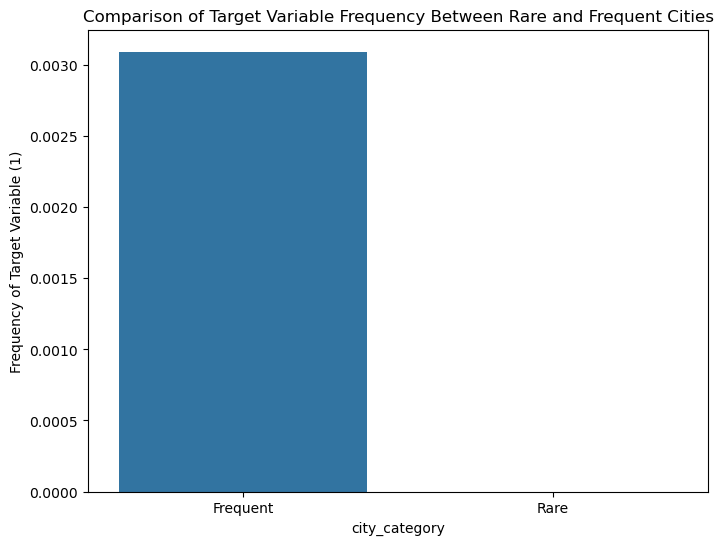

In [724]:
plt.figure(figsize=(8, 6))
sns.barplot(x='city_category', y='event_action', data=target_mean_by_category)
plt.ylabel('Frequency of Target Variable (1)')
plt.title('Comparison of Target Variable Frequency Between Rare and Frequent Cities')
plt.show()

In [725]:
target_mean_by_category

,city_category,event_action
0,Frequent,0.003092
1,Rare,0.000000


In [37]:
# Since cities below the frequency threshold of 1 show no signs of correlation with the target value,
# we can replace all such cities with 'other_city'

In [727]:
df_try.head()

,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,city_category
0,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,2021-11-24,3,event,podpiska.sberauto.com/,sub_page_view,0,Frequent
2,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,2021-11-14,3,event,podpiska.sberauto.com/,sub_page_view,0,Frequent
3,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28,10,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,0,Frequent
19,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,2021-05-29,2,event,podpiska.sberauto.com/,sub_page_view,0,Frequent
22,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,2021-05-29,3,event,sberauto.com/cars?city=1&rental_page=rental_on...,quiz,0,Frequent


In [728]:
df_try.head()

,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,city_category
0,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,2021-11-24,3,event,podpiska.sberauto.com/,sub_page_view,0,Frequent
2,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,2021-11-14,3,event,podpiska.sberauto.com/,sub_page_view,0,Frequent
3,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28,10,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,0,Frequent
19,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,2021-05-29,2,event,podpiska.sberauto.com/,sub_page_view,0,Frequent
22,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,2021-05-29,3,event,sberauto.com/cars?city=1&rental_page=rental_on...,quiz,0,Frequent


In [729]:
df_filtered.geo_city = df_filtered.geo_city.apply(
    lambda x: 'other_city' if city_counts[x] <= 1 else x)

In [730]:
df_try.geo_city.nunique()

2389

In [731]:
df_try.geo_country.nunique()

159

In [732]:
df_try.geo_country.value_counts()

geo_country
Russia                 1642346
Ukraine                   8392
United States             8109
Belarus                   3394
Kazakhstan                2100
                        ...   
Paraguay                     1
New Caledonia                1
Puerto Rico                  1
Yemen                        1
Congo - Brazzaville          1
Name: count, Length: 159, dtype: int64

In [733]:
num_unique_cities = (df_try.geo_country.value_counts() <= 500).sum()
num_unique_cities

139

In [734]:
# Считаем количество вхождений каждого города
country_counts = df_try['geo_country'].value_counts()
    
df_try['country_category'] = df_try['geo_country'].apply(lambda x: 'Rare' if country_counts[x] <= 44 else 'Frequent')
target_mean_by_category = df_try.groupby('country_category')['event_action'].mean().reset_index()

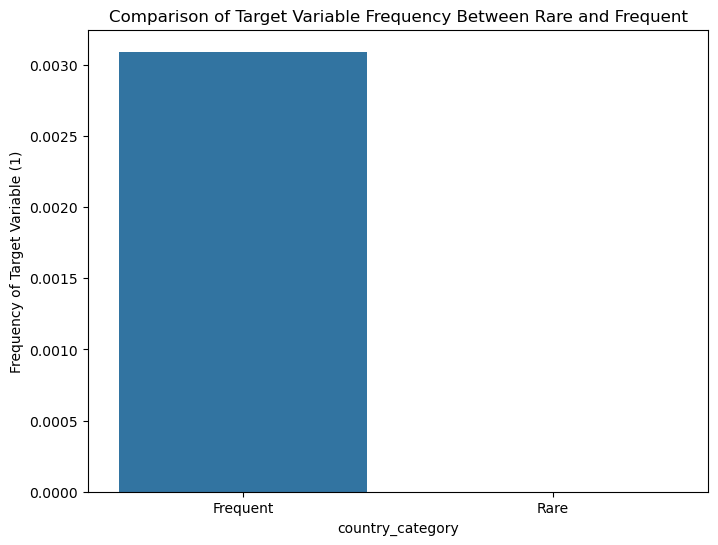

In [735]:
plt.figure(figsize=(8, 6))
sns.barplot(x='country_category', y='event_action', data=target_mean_by_category)
plt.ylabel('Frequency of Target Variable (1)')
plt.title('Comparison of Target Variable Frequency Between Rare and Frequent')
plt.show()

In [736]:
target_mean_by_category

,country_category,event_action
0,Frequent,0.003092
1,Rare,0.000000


In [39]:
# Since countries with a frequency below 55 show no signs of correlation with the target value,
# we can replace all such countries with 'other_countries'

In [743]:
df_filtered.geo_country = df_filtered.geo_country.apply(
    lambda x: 'other_countries' if country_counts[x] <= 44 else x)

In [746]:
df_try.geo_country.value_counts()

geo_country
Russia                 1642346
Ukraine                   8392
United States             8109
Belarus                   3394
Kazakhstan                2100
                        ...   
Paraguay                     1
New Caledonia                1
Puerto Rico                  1
Yemen                        1
Congo - Brazzaville          1
Name: count, Length: 159, dtype: int64

In [747]:
# utm_campaign             407
# utm_adcontent            281
# device_category            3
# device_brand             201
# device_browser            55

In [748]:
df_try.utm_campaign.value_counts()

utm_campaign
LTuZkdKfxRGVceoWkVyg    412090
LEoPHuyFvzoNfnzGgfcd    314850
FTjNLDyTrXaWYgZymFkV    223025
other                   194723
gecBYcKZCPMcVYdSSzKP    131110
                         ...  
qPDTdivQVeflLjTYIJnG         1
InOGyxvxAfYvSHCpIjJZ         1
ehLonfPENrOEoPTIyiOZ         1
YlsczTIyBSwTLNtuDkCd         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 407, dtype: int64

In [749]:
num_unique_cities = (df_try.utm_campaign.value_counts() <= 10).sum()
num_unique_cities

117

In [750]:
df_try.utm_campaign.nunique()

407

In [751]:
utm_campaign_counts = df_try['utm_campaign'].value_counts()
    
df_try['utm_campaign_category'] = df_try['utm_campaign'].apply(lambda x: 'Rare' if utm_campaign_counts[x] <= 8 else 'Frequent')
target_mean_by_category = df_try.groupby('utm_campaign_category')['event_action'].mean().reset_index()

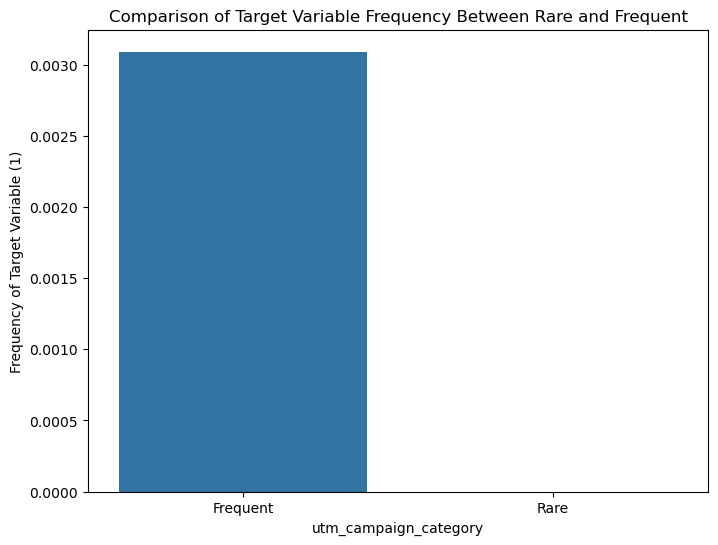

In [752]:
plt.figure(figsize=(8, 6))
sns.barplot(x='utm_campaign_category', y='event_action', data=target_mean_by_category)
plt.ylabel('Frequency of Target Variable (1)')
plt.title('Comparison of Target Variable Frequency Between Rare and Frequent')
plt.show()

In [753]:
target_mean_by_category

,utm_campaign_category,event_action
0,Frequent,0.003091
1,Rare,0.000000


In [41]:
# This is a similar situation as in the previous case

In [755]:
df_filtered.utm_campaign = df_filtered.utm_campaign.apply(
    lambda x: 'other_utm_campaign' if utm_campaign_counts[x] <= 8 else x)

In [756]:
df_try.utm_campaign.value_counts()

utm_campaign
LTuZkdKfxRGVceoWkVyg    412090
LEoPHuyFvzoNfnzGgfcd    314850
FTjNLDyTrXaWYgZymFkV    223025
other                   194723
gecBYcKZCPMcVYdSSzKP    131110
                         ...  
qPDTdivQVeflLjTYIJnG         1
InOGyxvxAfYvSHCpIjJZ         1
ehLonfPENrOEoPTIyiOZ         1
YlsczTIyBSwTLNtuDkCd         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 407, dtype: int64

In [757]:
df_try.utm_adcontent.value_counts()

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    910870
other                   301866
vCIpmpaGBnIQhyYNkXqp    179438
xhoenQgDQsgfEPYNPwKO    103797
PkybGvWbaqORmxjNunqZ     53589
                         ...  
PlanrlymnpCeYvUrUTVJ         1
JgmeMvxiYyrYlmqauiSv         1
QMmfrhgnqNOwSTPaqlLK         1
EsbpyHMkFkavykEeYhch         1
oJivRDNIrrOckRBIKOtG         1
Name: count, Length: 281, dtype: int64

In [759]:
num_unique_cities = (df_try.utm_adcontent.value_counts() <= 1).sum()
num_unique_cities

41

In [762]:
df_try.utm_adcontent.nunique()

281

In [765]:
utm_adcontent_counts = df_try['utm_adcontent'].value_counts()
    
df_try['utm_adcontent_category'] = df_try['utm_adcontent'].apply(lambda x: 'Rare' if utm_adcontent_counts[x] <= 7 else 'Frequent')
target_mean_by_category = df_try.groupby('utm_adcontent_category')['event_action'].mean().reset_index()

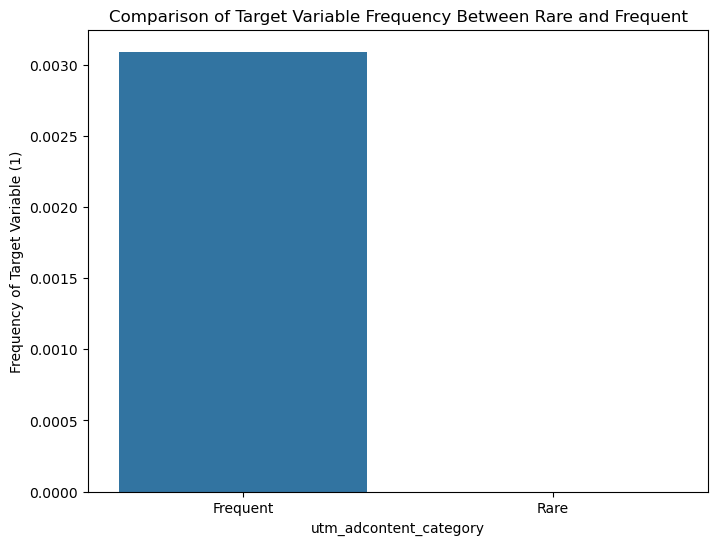

In [766]:
plt.figure(figsize=(8, 6))
sns.barplot(x='utm_adcontent_category', y='event_action', data=target_mean_by_category)
plt.ylabel('Frequency of Target Variable (1)')
plt.title('Comparison of Target Variable Frequency Between Rare and Frequent')
plt.show()

In [767]:
target_mean_by_category

,utm_adcontent_category,event_action
0,Frequent,0.003091
1,Rare,0.000000


In [43]:
# This is a similar situation as in the previous case

In [769]:
df_filtered.utm_adcontent = df_filtered.utm_adcontent.apply(
    lambda x: 'other_utm_adcontent' if utm_adcontent_counts[x] <= 7 else x)

In [770]:
df_try[(df_filtered.utm_adcontent == 'other_utm_adcontent') & (df_filtered.event_action == 1)]

,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,...,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,city_category,country_category,utm_campaign_category,utm_adcontent_category


In [771]:
df_try.utm_adcontent.value_counts()

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    910870
other                   301866
vCIpmpaGBnIQhyYNkXqp    179438
xhoenQgDQsgfEPYNPwKO    103797
PkybGvWbaqORmxjNunqZ     53589
                         ...  
PlanrlymnpCeYvUrUTVJ         1
JgmeMvxiYyrYlmqauiSv         1
QMmfrhgnqNOwSTPaqlLK         1
EsbpyHMkFkavykEeYhch         1
oJivRDNIrrOckRBIKOtG         1
Name: count, Length: 281, dtype: int64

In [772]:
df_try.device_brand.value_counts()

device_brand
Apple       483749
other       336939
Samsung     308961
Xiaomi      263494
Huawei      172183
             ...  
Tesla            1
Vodafone         1
Wexler           1
Smarteo          1
Maxvi            1
Name: count, Length: 201, dtype: int64

In [773]:
num_unique = (df_try.device_brand.value_counts() <= 10).sum()
num_unique

117

In [774]:
df_try.device_brand.nunique()

201

In [775]:
device_brand_counts = df_try['device_brand'].value_counts()
    
df_try['device_brand_category'] = df_try['device_brand'].apply(lambda x: 'Rare' if device_brand_counts[x] <= 2 else 'Frequent')
target_mean_by_category = df_try.groupby('device_brand_category')['event_action'].mean().reset_index()

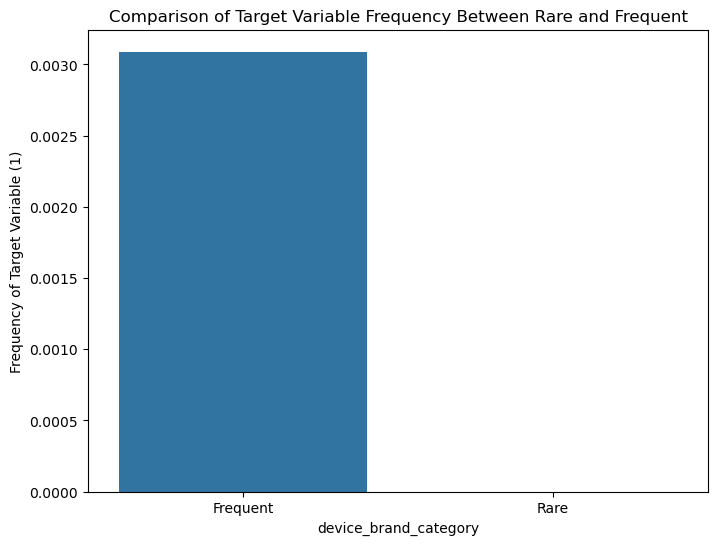

In [776]:
plt.figure(figsize=(8, 6))
sns.barplot(x='device_brand_category', y='event_action', data=target_mean_by_category)
plt.ylabel('Frequency of Target Variable (1)')
plt.title('Comparison of Target Variable Frequency Between Rare and Frequent')
plt.show()

In [777]:
target_mean_by_category

,device_brand_category,event_action
0,Frequent,0.003091
1,Rare,0.000000


In [778]:
df_filtered.device_brand = df_filtered.device_brand.apply(
    lambda x: 'other_device_brand' if device_brand_counts[x] <= 2 else x)

In [783]:
df_filtered.device_brand.value_counts()

device_brand
Apple      483749
other      336939
Samsung    308961
Xiaomi     263494
Huawei     172183
            ...  
Advan           3
AT&T            3
Vestel          3
Fujitsu         3
Qbex            3
Name: count, Length: 140, dtype: int64

In [784]:
df_try[(df_filtered.device_brand == 'other_device_brand') & (df_filtered.event_action == 1)]

,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,...,hit_number,hit_type,hit_page_path,event_category,event_action,city_category,country_category,utm_campaign_category,utm_adcontent_category,device_brand_category


In [785]:
df_filtered.device_brand.value_counts()

device_brand
Apple      483749
other      336939
Samsung    308961
Xiaomi     263494
Huawei     172183
            ...  
Advan           3
AT&T            3
Vestel          3
Fujitsu         3
Qbex            3
Name: count, Length: 140, dtype: int64

In [786]:
df_try.visit_time.value_counts()

visit_time
13:00:00    55769
12:00:00    55471
14:00:00    54801
10:00:00    54382
11:00:00    54241
            ...  
05:28:49        1
03:44:30        1
03:36:26        1
03:53:01        1
04:30:09        1
Name: count, Length: 85032, dtype: int64

In [787]:
num_unique_cities = (df_try.visit_time.value_counts() <= 5).sum()
num_unique_cities

24963

In [788]:
df_try.visit_time.nunique()

85032

In [789]:
df_try.visit_time.head()

0     14:36:32
2     08:21:30
3     02:42:06
19    05:00:00
22    05:00:00
Name: visit_time, dtype: object

In [790]:
df_try.visit_time = pd.to_datetime(df_try.visit_time)

/var/folders/3s/h4tbdn8n3bg8g9r44dkph73w0000gn/T/ipykernel_2441/3993690317.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_try.visit_time = pd.to_datetime(df_try.visit_time)


In [791]:
df_try.visit_time.head()

0    2025-05-12 14:36:32
2    2025-05-12 08:21:30
3    2025-05-12 02:42:06
19   2025-05-12 05:00:00
22   2025-05-12 05:00:00
Name: visit_time, dtype: datetime64[ns]

In [792]:
df_try['vist_hours'] = df_try.visit_time.dt.hour

In [793]:
df_try = df_try.drop(columns='visit_time')

In [794]:
df_try['vist_hours']

0           14
2            8
3            2
19           5
22           5
            ..
15685150    10
15685152     8
15685163    15
15685204    15
15685206    19
Name: vist_hours, Length: 1691967, dtype: int32

In [918]:
vist_hours_counts = df_try['vist_hours'].value_counts()
    
df_try['vist_hours_category'] = df_try['vist_hours'].apply(lambda x: 'Rare' if vist_hours_counts[x] <= 19000 else 'Frequent')
target_mean_by_category = df_try.groupby('vist_hours_category')['event_action'].mean().reset_index()

In [919]:
df_try['vist_hours'].value_counts()

vist_hours
14    102191
16     96093
15     95052
13     93560
17     92649
12     92543
18     92475
11     91653
10     90813
19     89944
20     89792
21     88365
22     84843
9      83029
23     76571
8      65610
0      60446
7      50024
1      36729
6      33604
2      24956
5      23223
3      19243
4      18559
Name: count, dtype: int64

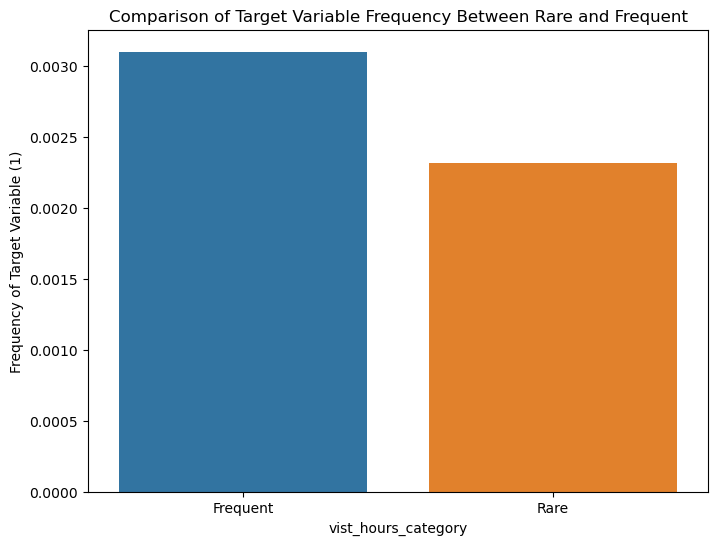

In [922]:
plt.figure(figsize=(8, 6))
sns.barplot(x='vist_hours_category', y='event_action', data=target_mean_by_category)
plt.ylabel('Frequency of Target Variable (1)')
plt.title('Comparison of Target Variable Frequency Between Rare and Frequent')
plt.show()

In [45]:
# In this case, I will simply create a new feature that stores the hour extracted from visit_time

In [805]:
df_filtered.visit_time = pd.to_datetime(df_filtered.visit_time)

/var/folders/3s/h4tbdn8n3bg8g9r44dkph73w0000gn/T/ipykernel_2441/2595467590.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtered.visit_time = pd.to_datetime(df_filtered.visit_time)


In [810]:
df_filtered['vist_hours'] = df_filtered.visit_time.dt.hour

In [811]:
df_filtered = df_filtered.drop(columns='visit_time')

In [812]:
df_try.hit_page_path.value_counts()

hit_page_path
podpiska.sberauto.com/                                                                                                                                                                                                                                                                        887137
sberauto.com/cars?city=1&rental_page=rental_only&rental_car=rental_only&city=18                                                                                                                                                                                                                34215
sberauto.com/cars?utm_source_initial=sbol&utm_medium_initial=banner&utm_campaign_initial=LEoPHuyFvzoNfnzGgfcd&utm_content_initial=vCIpmpaGBnIQhyYNkXqp&city=1&rental_page=rental_only&rental_car=rental_only&city=18                                                                           33176
sberauto.com/cars/2fc745ed?rental_page=rental_car                                                          

In [839]:
df_try.hit_page_path.nunique()

209101

In [840]:
df_try.hit_page_path.head()

0                                podpiska.sberauto.com/
2                                podpiska.sberauto.com/
3     sberauto.com/cars?utm_source_initial=sbol&utm_...
19                               podpiska.sberauto.com/
22    sberauto.com/cars?city=1&rental_page=rental_on...
Name: hit_page_path, dtype: object

In [841]:
df_try.hit_page_path.tail()

15685150     podpiska.sberauto.com/?yclid=1459011418004652031
15685152                               podpiska.sberauto.com/
15685163    sberauto.com/cars/all/mercedes-benz/glc/f8f330...
15685204                               podpiska.sberauto.com/
15685206    sberauto.com/cars/all/mercedes-benz/e-klasse/d...
Name: hit_page_path, dtype: object

In [842]:
df_try['hit_page_path'] = df_try.hit_page_path.apply(lambda x: x.split('/')[0])

In [848]:
df_try.hit_page_path.value_counts()

hit_page_path
podpiska.sberauto.com                        1007631
sberauto.com                                  678021
                                                3379
client.saptest.sberauto-team.com                 941
client.preprod.sberauto.com                      518
localhost                                        310
client.sap.sberauto-team.com                     290
sberauto-client.sap.sberauto.com                 221
podpiska-sberauto-com.translate.goog             141
client.stage.sberauto.com                        117
client.stage2.sberauto.com                        74
client.aromanchuk.sberauto-team.com               64
client.aahmedova.sberauto-team.com                40
client.knikolaev.sberauto-team.com                16
client.agrebenschikov.sberauto-team.com           16
client.degipti.sberauto-team.com                  15
client.np.sberauto-team.com                       15
client.akoryakov.sberauto-team.com                14
client.mmuraveva.sberauto-team.c

In [926]:
hit_page_path_counts = df_try['hit_page_path'].value_counts()
    
df_try['hit_page_path_category'] = df_try['hit_page_path'].apply(lambda x: 'Rare' if hit_page_path_counts[x] <= 8 else 'Frequent')
target_mean_by_category = df_try.groupby('hit_page_path_category')['event_action'].mean().reset_index()

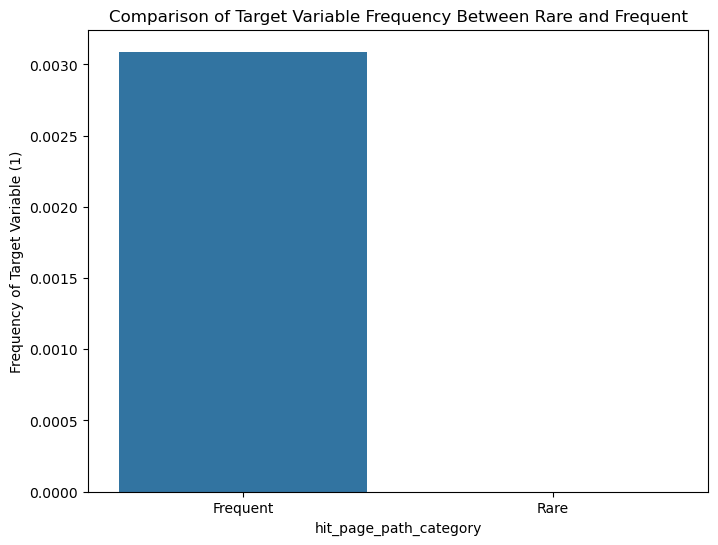

In [927]:
plt.figure(figsize=(8, 6))
sns.barplot(x='hit_page_path_category', y='event_action', data=target_mean_by_category)
plt.ylabel('Frequency of Target Variable (1)')
plt.title('Comparison of Target Variable Frequency Between Rare and Frequent')
plt.show()

In [47]:
# We can extract the first value from hit_page_path before the "/" (the site)
# Following the previous approach, we'll replace uninformative values with the new value 'other'

In [910]:
df_filtered['hit_page_path'] = df_filtered.hit_page_path.apply(lambda x: x.split('/')[0])

In [930]:
df_filtered.hit_page_path = df_filtered.hit_page_path.apply(
    lambda x: 'other_hit_page_path' if hit_page_path_counts[x] <= 8 else x)

In [932]:
df_filtered.hit_page_path.value_counts()

hit_page_path
podpiska.sberauto.com                      1007631
sberauto.com                                678021
                                              3379
client.saptest.sberauto-team.com               941
client.preprod.sberauto.com                    518
localhost                                      310
client.sap.sberauto-team.com                   290
sberauto-client.sap.sberauto.com               221
podpiska-sberauto-com.translate.goog           141
client.stage.sberauto.com                      117
other_hit_page_path                             85
client.stage2.sberauto.com                      74
client.aromanchuk.sberauto-team.com             64
client.aahmedova.sberauto-team.com              40
client.knikolaev.sberauto-team.com              16
client.agrebenschikov.sberauto-team.com         16
client.degipti.sberauto-team.com                15
client.np.sberauto-team.com                     15
client.akoryakov.sberauto-team.com              14
client.mmuraveva.

In [942]:
df_try.device_screen_resolution.value_counts()

device_screen_resolution
414x896      146444
1920x1080    114066
393x851      104746
375x812      102158
360x780       85695
              ...  
620x1090          1
514x1129          1
496x600           1
841x421           1
464x1123          1
Name: count, Length: 4947, dtype: int64

In [958]:
df_try['resoluton1'] = df_try.device_screen_resolution.apply(
    lambda x: x.split('x')[0]
)
df_try['resoluton2'] = df_try.device_screen_resolution.apply(
    lambda x: x.split('x')[1]
)

In [960]:
df_try['resoluton1'].value_counts()

resoluton1
360     364230
375     188001
393     181046
414     176143
412     171404
         ...  
1266         1
1039         1
993          1
1174         1
1905         1
Name: count, Length: 1166, dtype: int64

In [962]:
df_try['resoluton2'].value_counts()

resoluton2
896     146483
1080    119829
851     104785
812     102181
780      85727
         ...  
1269         1
2195         1
1286         1
1829         1
1255         1
Name: count, Length: 1079, dtype: int64

In [970]:
resoluton1_counts = df_try['resoluton1'].value_counts()
    
df_try['resoluton1_category'] = df_try['resoluton1'].apply(
    lambda x: 'Rare' if resoluton1_counts[x] <= 1 else 'Frequent')
target_mean_by_category = df_try.groupby('resoluton1_category')['event_action'].mean().reset_index()

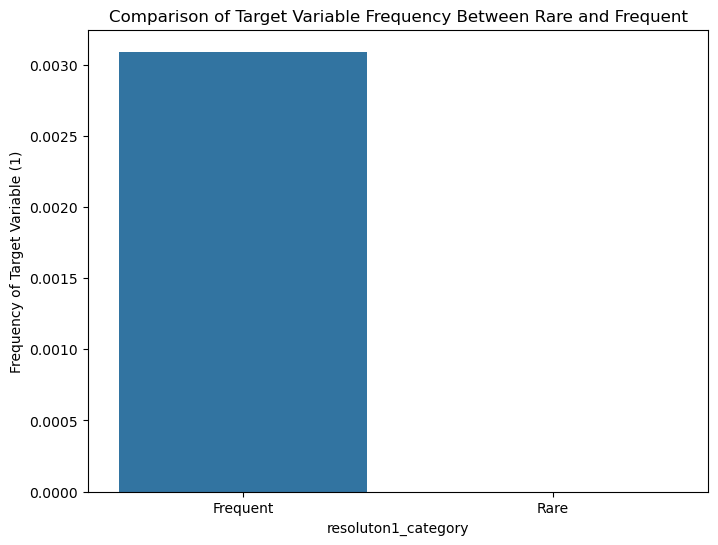

In [971]:
plt.figure(figsize=(8, 6))
sns.barplot(x='resoluton1_category', y='event_action', data=target_mean_by_category)
plt.ylabel('Frequency of Target Variable (1)')
plt.title('Comparison of Target Variable Frequency Between Rare and Frequent')
plt.show()

In [982]:
resoluton2_counts = df_try['resoluton2'].value_counts()
    
df_try['resoluton2_category'] = df_try['resoluton2'].apply(
    lambda x: 'Rare' if resoluton2_counts[x] <= 1 else 'Frequent')
target_mean_by_category = df_try.groupby('resoluton2_category')['event_action'].mean().reset_index()

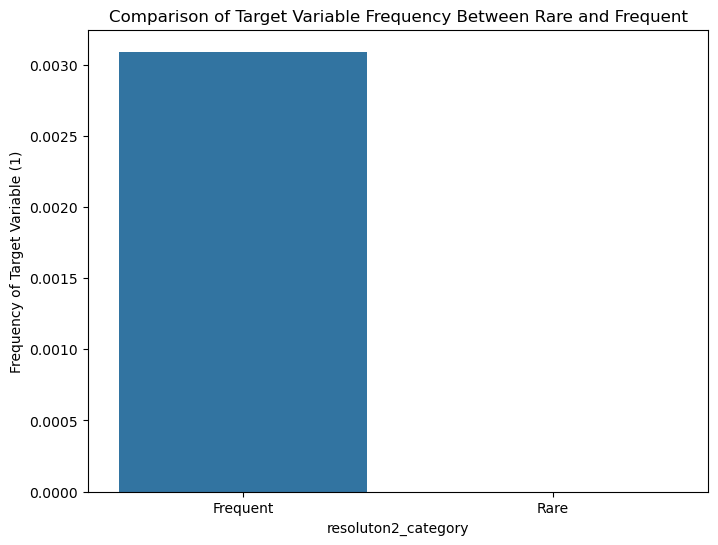

In [983]:
plt.figure(figsize=(8, 6))
sns.barplot(x='resoluton2_category', y='event_action', data=target_mean_by_category)
plt.ylabel('Frequency of Target Variable (1)')
plt.title('Comparison of Target Variable Frequency Between Rare and Frequent')
plt.show()

In [49]:
# In this case, we will create two new features from device_screen_resolution

# and then replace uninformative values in these two new features

In [990]:
df_filtered['resoluton1'] = df_filtered.device_screen_resolution.apply(
    lambda x: x.split('x')[0]
)
df_filtered['resoluton2'] = df_filtered.device_screen_resolution.apply(
    lambda x: x.split('x')[1]
)

In [992]:
df_filtered.resoluton1 = df_filtered.resoluton1.apply(
    lambda x: 'other_resoluton1' if resoluton1_counts[x] <= 1 else x)
df_filtered.resoluton2 = df_filtered.resoluton2.apply(
    lambda x: 'other_resoluton2' if resoluton2_counts[x] <= 1 else x)

In [ ]:
df_filtered

In [994]:
df_filtered.resoluton1.value_counts()

resoluton1
360     364230
375     188001
393     181046
414     176143
412     171404
         ...  
1178         2
1051         2
1016         2
894          2
1133         2
Name: count, Length: 845, dtype: int64

In [996]:
df_filtered.resoluton2.value_counts()

resoluton2
896     146483
1080    119829
851     104785
812     102181
780      85727
         ...  
1275         2
603          2
455          2
539          2
566          2
Name: count, Length: 832, dtype: int64

In [1004]:
df_filtered = df_filtered.drop(columns='device_screen_resolution')

In [1177]:
df_try.hit_date = pd.to_datetime(df_try.hit_date)

In [1193]:
df_try.hit_date.dt.day.value_counts()

hit_date
24    88827
29    75120
21    72673
25    69758
30    69286
14    60304
28    58368
26    57324
17    55524
22    54918
23    54869
16    54815
27    54642
15    54280
13    53518
18    53397
19    53109
12    51993
20    49765
11    48843
6     48594
10    48480
1     47271
7     47267
9     46623
5     46353
8     46041
2     45169
3     43753
31    40589
4     40494
Name: count, dtype: int64

In [1189]:
df_try.hit_date.dt.month.value_counts()

hit_date
12    366244
11    263835
10    260876
9     236262
7     168944
8     148858
6     148372
5      98576
Name: count, dtype: int64

In [1191]:
df_try.hit_date.dt.year.value_counts()

hit_date
2021    1691967
Name: count, dtype: int64

In [51]:
# Create two new features from hit_date: extract the day and the month

In [1197]:
df_filtered['hit_date'] = pd.to_datetime(df_filtered['hit_date'])

In [1199]:
df_filtered['hit_month'] = df_filtered['hit_date'].dt.month

In [1207]:
df_filtered['hit_day'] = df_filtered['hit_date'].dt.day

In [1209]:
df_filtered = df_filtered.drop(columns=['hit_date'])

In [1211]:
df_filtered.head()

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_browser,geo_country,geo_city,hit_number,hit_type,hit_page_path,event_category,event_action,vist_hours,resoluton1,resoluton2,hit_month,hit_day
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,Russia,Zlatoust,3,event,podpiska.sberauto.com,sub_page_view,0,14,360,720,11,24
2,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,Samsung Internet,Russia,Moscow,3,event,podpiska.sberauto.com,sub_page_view,0,8,385,854,11,14
3,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,Russia,Krasnoyarsk,10,event,sberauto.com,search_form,0,2,360,720,12,28
19,1,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,Chrome,Russia,Moscow,2,event,podpiska.sberauto.com,sub_page_view,0,5,393,786,5,29
22,2,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Xiaomi,Chrome,Russia,Moscow,3,event,sberauto.com,quiz,0,5,393,786,5,29


In [1213]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1691967 entries, 0 to 15685206
Data columns (total 20 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   visit_number     int64 
 1   utm_source       object
 2   utm_medium       object
 3   utm_campaign     object
 4   utm_adcontent    object
 5   device_category  object
 6   device_brand     object
 7   device_browser   object
 8   geo_country      object
 9   geo_city         object
 10  hit_number       int64 
 11  hit_type         object
 12  hit_page_path    object
 13  event_category   object
 14  event_action     int64 
 15  vist_hours       int32 
 16  resoluton1       object
 17  resoluton2       object
 18  hit_month        int32 
 19  hit_day          int32 
dtypes: int32(3), int64(3), object(14)
memory usage: 251.7+ MB


In [1215]:
df_filtered.nunique()

visit_number        533
utm_source          281
utm_medium           55
utm_campaign        301
utm_adcontent       186
device_category       3
device_brand        140
device_browser       55
geo_country          69
geo_city           1557
hit_number          355
hit_type              1
hit_page_path        24
event_category       38
event_action          2
vist_hours           24
resoluton1          845
resoluton2          832
hit_month             8
hit_day              31
dtype: int64

In [53]:
# Now the number of unique values in each category has decreased

In [55]:
# All missing values have been handled and transformations in the columns have been completed

In [1221]:
df_ready = df_filtered.copy()

# Modeling

In [1224]:
df_ready.head()

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_browser,geo_country,geo_city,hit_number,hit_type,hit_page_path,event_category,event_action,vist_hours,resoluton1,resoluton2,hit_month,hit_day
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,Russia,Zlatoust,3,event,podpiska.sberauto.com,sub_page_view,0,14,360,720,11,24
2,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,Samsung Internet,Russia,Moscow,3,event,podpiska.sberauto.com,sub_page_view,0,8,385,854,11,14
3,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,Chrome,Russia,Krasnoyarsk,10,event,sberauto.com,search_form,0,2,360,720,12,28
19,1,kjsLglQLzykiRbcDiGcD,cpc,other,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,Chrome,Russia,Moscow,2,event,podpiska.sberauto.com,sub_page_view,0,5,393,786,5,29
22,2,kjsLglQLzykiRbcDiGcD,cpc,other,other,mobile,Xiaomi,Chrome,Russia,Moscow,3,event,sberauto.com,quiz,0,5,393,786,5,29


In [1226]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1691967 entries, 0 to 15685206
Data columns (total 20 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   visit_number     int64 
 1   utm_source       object
 2   utm_medium       object
 3   utm_campaign     object
 4   utm_adcontent    object
 5   device_category  object
 6   device_brand     object
 7   device_browser   object
 8   geo_country      object
 9   geo_city         object
 10  hit_number       int64 
 11  hit_type         object
 12  hit_page_path    object
 13  event_category   object
 14  event_action     int64 
 15  vist_hours       int32 
 16  resoluton1       object
 17  resoluton2       object
 18  hit_month        int32 
 19  hit_day          int32 
dtypes: int32(3), int64(3), object(14)
memory usage: 251.7+ MB


In [57]:
# Let's create embeddings for categorical features, since encoding them with OneHotEncoder is not practical,
# as it would result in an unreasonably large number of binary features in the dataset
# For this, we will use the CategoryEmbeddingModelConfig model, which automatically generates embeddings during training

In [1467]:
df_ready.columns

Index(['visit_number', 'utm_source', 'utm_medium', 'utm_campaign',
       'utm_adcontent', 'device_category', 'device_brand', 'device_browser',
       'geo_country', 'geo_city', 'hit_number', 'hit_type', 'hit_page_path',
       'event_category', 'event_action', 'vist_hours', 'resoluton1',
       'resoluton2', 'hit_month', 'hit_day'],
      dtype='object')

In [1480]:
data_config = DataConfig(
    target=["event_action"],
    continuous_cols = ["visit_number", "hit_number"],
    categorical_cols = ['utm_source', 'utm_medium', 'utm_campaign',
                       'utm_adcontent', 'device_category', 'device_brand', 'device_browser',
                       'geo_country', 'geo_city', 'hit_type', 'hit_page_path',
                       'event_category', 'vist_hours', 'resoluton1',
                       'resoluton2', 'hit_month', 'hit_day']
)

model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="64-128-64-32",
    activation="ReLU",
    learning_rate=0.0001,
    metrics=['accuracy']
)

In [1482]:
# === 4. Обучение модели ===
trainer = TrainerConfig(
    max_epochs=5, 
    batch_size=512
)

optimizer = OptimizerConfig(
    optimizer="RMSprop",
    lr_scheduler="ReduceLROnPlateau",
    lr_scheduler_params={"patience": 5, "factor": 0.5},
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer,
    trainer_config=trainer
)

2025-05-12 21:17:42,384 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

In [59]:
# Let's create three datasets: training, validation, and test
# Using stratify to ensure class balance, especially for the minority class
# We will train on the training set and then make predictions on the test set

In [1490]:
train_df, test_df = train_test_split(df_ready, test_size=0.2, stratify=df_ready["event_action"], random_state=42)

train, val = train_test_split(train_df, test_size=0.2, stratify=train_df["event_action"], random_state=42)

tabular_model.fit(train=train, validation=val)

Seed set to 42


2025-05-12 21:19:56,541 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-05-12 21:19:57,936 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
classification task

2025-05-12 21:20:01,814 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-05-12 21:20:01,995 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-05-12 21:20:02,068 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

/opt/anaconda3/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/artemzajcev/Documents/Skillbox - Data Science/"ML-инженер" project/Notebook/saved_models exists and is not empty.


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │ 51.5 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  208 K │ train │
│ 2 │ head             │ LinearHead                │     66 │ train │
│ 3 │ loss             │ CrossEntropyLoss          │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 259 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 259 K                                                                                                
Total estimated model params size (MB): 1                                                                          
Modules in train mode: 35                                                                                          
Modules in eval mode: 0

Output()

/opt/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=10` in the `DataLoader` to improve performance.

/opt/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 
'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the 
`num_workers` argument` to `num_workers=10` in the `DataLoader` to improve performance.

`Trainer.fit` stopped: `max_epochs=1` reached.


2025-05-12 21:20:42,585 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-05-12 21:20:42,586 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

/opt/anaconda3/lib/python3.11/site-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=map_loc

In [1492]:
model = tabular_model.model
model

CategoryEmbeddingModel(
  (_backbone): CategoryEmbeddingBackbone(
    (linear_layers): Sequential(
      (0): Linear(in_features=512, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=128, bias=True)
      (3): ReLU()
      (4): Linear(in_features=128, out_features=64, bias=True)
      (5): ReLU()
      (6): Linear(in_features=64, out_features=32, bias=True)
      (7): ReLU()
    )
  )
  (_embedding_layer): Embedding1dLayer(
    (cat_embedding_layers): ModuleList(
      (0): Embedding(250, 50)
      (1): Embedding(55, 28)
      (2): Embedding(302, 50)
      (3): Embedding(187, 50)
      (4): Embedding(4, 2)
      (5): Embedding(140, 50)
      (6): Embedding(56, 28)
      (7): Embedding(70, 35)
      (8): Embedding(1503, 50)
      (9): Embedding(2, 1)
      (10): Embedding(25, 13)
      (11): Embedding(38, 19)
      (12): Embedding(25, 13)
      (13): Embedding(821, 50)
      (14): Embedding(815, 50)
      (15): Embedding(9, 5)
      (16): Embe

In [1494]:
preds_test = tabular_model.predict(test_df)

preds_test["true_label"] = test_df["event_action"].values

roc_auc = roc_auc_score(preds_test["true_label"], preds_test["event_action_1_probability"])
print(f"ROC AUC on test set: {roc_auc:.4f}")

ROC AUC on test set: 0.9837


In [1496]:
df_roc_auc = preds_test[['event_action_1_probability', 'true_label']]

In [1498]:
df_roc_auc['event_action_1_probability'] = round(df_roc_auc['event_action_1_probability'], 4)

/var/folders/3s/h4tbdn8n3bg8g9r44dkph73w0000gn/T/ipykernel_2441/416258792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_roc_auc['event_action_1_probability'] = round(df_roc_auc['event_action_1_probability'], 4)


In [1500]:
df_roc_auc = df_roc_auc.sort_values("event_action_1_probability", ascending=False)

In [1502]:
df_roc_auc.head(60)

,event_action_1_probability,true_label
11949787,0.9648,1
8820977,0.9607,1
3915346,0.9463,1
12789553,0.9434,1
2665129,0.9415,1
8094806,0.9388,1
2442758,0.9388,1
8820867,0.9349,1
9922745,0.9329,1
4205667,0.9282,1


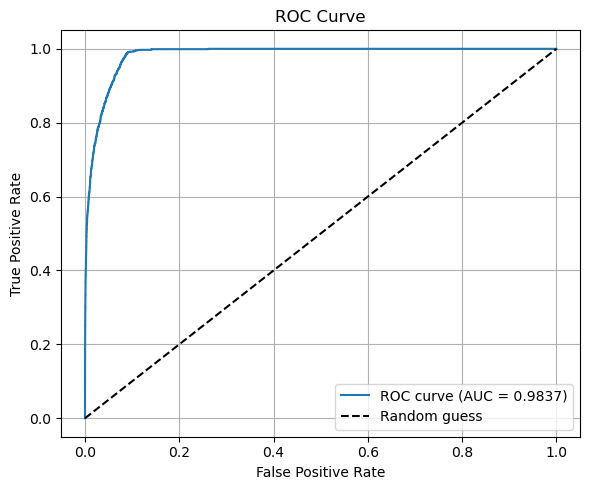

In [1504]:
fpr, tpr, thresholds = roc_curve(preds_test["true_label"], preds_test["event_action_1_probability"])

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

In [61]:
# Let's try creating another model — CatBoostClassifier

In [1545]:
df_ready.event_action.value_counts()

event_action
0    1686738
1       5229
Name: count, dtype: int64

In [1584]:
catboost_param_dist = {
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.1),
    'iterations': randint(10, 200),
    'l2_leaf_reg': randint(1, 10),
    'border_count': randint(1, 255),
    'bagging_temperature': uniform(0.0, 1.0),
    'random_strength': uniform(0.0, 1.0)
}

CB = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    class_weights={0: 1, 1: 10},
    verbose=50
)

random_search_cb = RandomizedSearchCV(
    estimator=CB,
    param_distributions=catboost_param_dist,
    cv=2,
    verbose=2,
    random_state=42,
    n_iter=5  
)

In [1586]:
X_train = train.drop("event_action", axis=1)
y_train = train["event_action"]

X_val = val.drop("event_action", axis=1)
y_val = val["event_action"]

In [1587]:
X_test = test_df.drop("event_action", axis=1)
y_test = test_df["event_action"]

In [1589]:
y_test.value_counts()

event_action
0    337348
1      1046
Name: count, dtype: int64

In [1592]:
y_val.value_counts()

event_action
0    269878
1       837
Name: count, dtype: int64

In [1594]:
y_train.value_counts()

event_action
0    1079512
1       3346
Name: count, dtype: int64

In [1596]:
random_search_cb.fit(X_train, y_train, eval_set=(X_val, y_val), cat_features=['utm_source', 'utm_medium', 'utm_campaign',
                       'utm_adcontent', 'device_category', 'device_brand', 'device_browser',
                       'geo_country', 'geo_city', 'hit_type', 'hit_page_path',
                       'event_category', 'vist_hours', 'resoluton1',
                       'resoluton2', 'hit_month', 'hit_day']
                     )
print("Best Parameters:", random_search_cb.best_params_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
0:	test: 0.7526366	best: 0.7526366 (0)	total: 116ms	remaining: 9.25s
50:	test: 0.9834600	best: 0.9834600 (50)	total: 2.93s	remaining: 1.73s
80:	test: 0.9864058	best: 0.9864058 (80)	total: 4.55s	remaining: 0us

bestTest = 0.9864057584
bestIteration = 80

[CV] END bagging_temperature=0.3745401188473625, border_count=93, depth=6, iterations=81, l2_leaf_reg=5, learning_rate=0.025601864044243652, random_strength=0.15599452033620265; total time=   6.3s
0:	test: 0.7539307	best: 0.7539307 (0)	total: 88.7ms	remaining: 7.1s
50:	test: 0.9837528	best: 0.9837752 (41)	total: 2.91s	remaining: 1.71s
80:	test: 0.9860572	best: 0.9860572 (80)	total: 4.56s	remaining: 0us

bestTest = 0.9860572293
bestIteration = 80

[CV] END bagging_temperature=0.3745401188473625, border_count=93, depth=6, iterations=81, l2_leaf_reg=5, learning_rate=0.025601864044243652, random_strength=0.15599452033620265; total time=   6.3s
0:	test: 0.7787231	best: 0.7787231 (0)

In [1606]:
catmodel = random_search_cb.best_estimator_  # <== вот тут

In [1608]:
y_pred = catmodel.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_test)
print(f"AUC: {auc:.4f}")

AUC: 0.9854


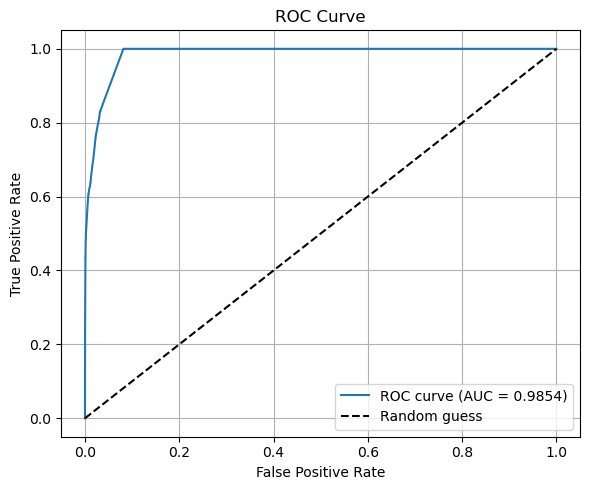

In [1612]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

In [1614]:
catboost_res_df = pd.DataFrame({
    "true_flag": y_test.values,
    "proba": y_pred
})
catboost_res_df = catboost_res_df.sort_values(by="proba", ascending=False)
catboost_res_df = catboost_res_df.reset_index(drop=True)

# results_df.to_csv("predictions.csv", index=False)
catboost_res_df.head(60)

,true_flag,proba
0,1,0.843966
1,1,0.828749
2,1,0.828749
3,1,0.828532
4,1,0.828454
5,1,0.828318
6,1,0.828318
7,1,0.828318
8,1,0.828317
9,1,0.828317


In [63]:
# Both models show very high performance, thanks to strong results on the test sets